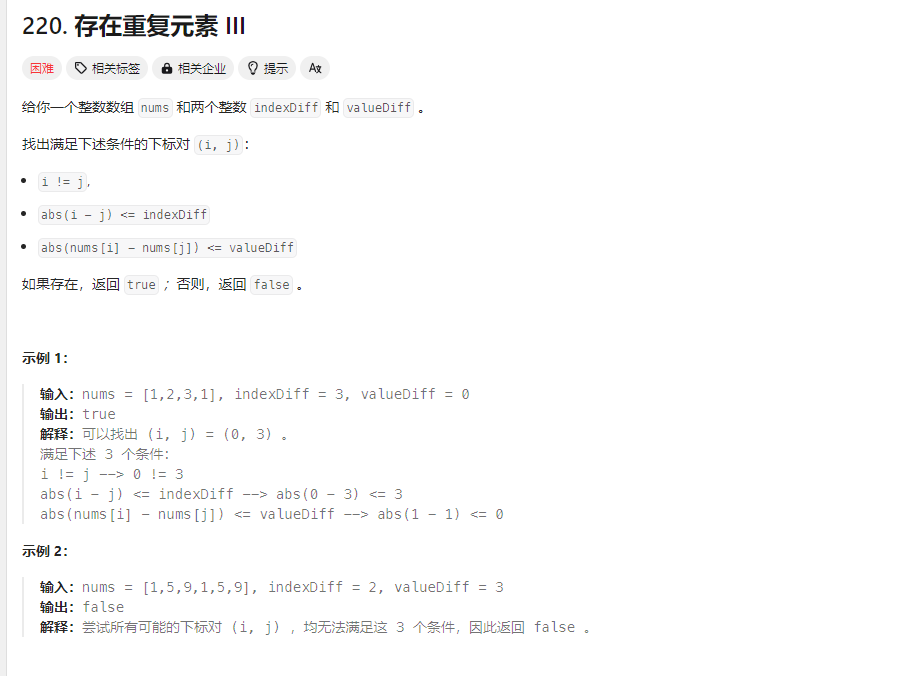

## 思路
### 因为有两个条件，所以有两种思路：一是先满足一个条件筛选出一些集合，在这些集合中再筛选结果
- 
- 所有元素都有一个绑定的标签然后判断每个标签窗口，然后滑动标签窗口判断能不能满足值的条件也就是说
- 当一个窗口中最小的差异小于值要求返回true直接中止循环
##  最小的差异？
- 怎么去求最小的差异
- 可以排序然后依次相减
- 因为排序后的最小差异只能存在相邻元素上

In [1]:
array = [1,2,4,5,6,7,8]
array[1:3]

[2, 4]

In [10]:
from typing import List


class Solution:
    def containsNearbyAlmostDuplicate(self, nums: List[int], indexDiff: int, valueDiff: int) -> bool:
        size = len(nums)

        # 窗口滑动的次数为 size - len(window) + 1
        # 而len(window) = indexDiff + 1
        if indexDiff >= size:
            m = 1
           # 有恶心人的窗口比数组还大
            n = size -1
        else:
            m = size - indexDiff
            n = indexDiff

        tag = False
        left = 0 
        while m != 0  and tag == False:
             
            
            # 将窗口单独拿出来
            window = nums[left:left + indexDiff + 1]  # 切片不包含最右边的元素
            window = sorted(window)     

            i = 0                       # 开始找最小的差异
            while i < n :
                value = abs(window[i] - window[i + 1])
                if  value <= valueDiff:
                    tag = True
                    return tag
                i += 1

            left += 1
            m -= 1 
        return tag # 最后也灭有找到


sa = Solution()
sa.containsNearbyAlmostDuplicate([-3,3], 2, 4)   

False

## 上面的会超时因为元素是无序的每移动一次就需要重排一次也太浪费时间了
## 因此需要找到一个数据结构维护滑动窗口内的元素
我们使用 sortedcontainers 模块中的 SortedList 来维护一个有序的滑动窗口。这样可以在 O(log k) 时间复杂度内进行插入和搜索操作，其中 k 是滑动窗口的大小。

In [12]:
from typing import List
from sortedcontainers import SortedList

class Solution:
    def containsNearbyAlmostDuplicate(self, nums: List[int], indexDiff: int, valueDiff: int) -> bool:
        # 检查边界条件
        if valueDiff < 0 or indexDiff < 1 or not nums:
            return False
        
        # 创建一个 SortedList 来维护滑动窗口
        sorted_list = SortedList()
        
        # 遍历数组
        for i, num in enumerate(nums):
            # 如果当前索引超过了 indexDiff，则移除滑动窗口最左边的元素
            if i > indexDiff:
                sorted_list.remove(nums[i - indexDiff - 1])
            
            # 查找 num 应该插入的位置 bisect_left 找到一个位置之前的元素都小于它
            pos = SortedList.bisect_left(sorted_list, num)
            
            # 检查右边的元素是否满足条件 pos 是要插入后挤走的元素那么 pos - 1 就是插入之前左边的元素
            if pos < len(sorted_list) and sorted_list[pos] - num <= valueDiff:
                return True
            
            # 检查左边的元素是否满足条件
            if pos > 0 and num - sorted_list[pos - 1] <= valueDiff:
                return True
            
            # 将当前元素加入滑动窗口
            sorted_list.add(num)
        
        # 遍历结束后如果没有找到满足条件的元素，返回 False
        return False

sa = Solution()
print(sa.containsNearbyAlmostDuplicate([-3, 3], 2, 4))


False
